# **Laborator 4: Transformata distanță (DT). Potrivirea modelelor**

În acest laborator vom studia un algoritm care calculează transformata distanță a unei
imagini binare (obiect și fundal). Această transformare permite evaluarea unui scor de
potrivire a modelului unui obiect cunoscut (de exemplu un contur de pieton) și un obiect
necunoscut, pentru a decide dacă obiectul necunoscut este sau nu similar cu obiectul model.
Cu cât scorul de potrivire este mai mic, cu atât obiectul necunoscut este mai asemănător
modelului.

## Fundamente teoretice

### Transformata distanță

Transformata distanță este un operator care se aplică în mod normal doar imaginilor binare.
Rezultatul transformării este o imagine grayscale, care seamănă cu imaginea intrare, dar în
care intensitățile punctelor arată distanța față de cel mai apropiat punct obiect.

În imaginea următoare avem un exemplu de aplicare a transformatei distanță pe o imagine
ce conține o formă dreptunghiulară. În imaginea din stânga, pixelii cu valoarea “0” sunt
pixeli obiect (puncte de muchie), iar cei cu valoarea “1” puncte de fundal. În imaginea din
dreapta, se vede rezultatul aplicării DT folosind metrica “tabla de șah”, unde fiecare valoare
codifică distanța față de un punct de muchie.

<p align="center">
    <img src="imgs/dt_small_example.png" alt="image"/>
</p>

De obicei transformata/harta este denumită pe baza metricii alese. De exemplu, se poate
vorbi de transformata distanță Manhattan, dacă metrica folosită este distanța Manhattan.

Alte metrici sunt:
- Distanța Euclidiană
- Distanța City block sau Manhattan;
- Distanța „tablă de șah”.

Există mai mulți algoritmi pentru implementarea DT:
- Chamfer DT;
- Euclidian DT;
- Voronoi diagram DT.

Cea mai directă metodă de calculare a transformatei distanță este metoda brute force. Aceasta presupune calcularea pentru fiecare pixel de fundal distanțele către fiecare pixel de obiect. Apoi se ia minimul dintre aceste distanțe pentru fiecare pixel de fundal. Metoda este foarte ineficientă, prin urma vom studia o soluție mai eficientă, transformata distanță Chamfer, care aproximează distanța Euclideană, este o metodă simplă și foarte rapidă, necesitând doar două parcurgeri ale imaginii binare. 

**Algoritmul Transformata Distanță Chamfer**
1. Se alege o mască de ponderi 3x3 care are valori proporționale cu distanțele Euclidiene față de elementul din mijloc. Cele mai simple și mai mici astfel de valori sunt 2 pentru deplasarea laterală și 3 pentru deplasarea diagonală. În acest fel distanțele obținute vor fi egale cu aproximativ dublul distanțelor euclidiene reale.

$$
ponderi = \begin{bmatrix} \textcolor{orange}{3} & \textcolor{orange}{2} & \textcolor{orange}{3} \\ \textcolor{orange}{2} & 0 & \textcolor{green}2 \\ \textcolor{green}{3} & \textcolor{green}{2} & \textcolor{green}{3} \end{bmatrix}
$$

2. Transformata distanță are aceeași dimensiune ca imaginea de intrare și se inițializează cu valori de zero și valori infinit:

$$
DT(i,j)=\begin{cases}
0, & \text{if } (i,j) \in \text{object} \\
\infty, & \text{if } (i,j) \notin \text{object}
\end{cases}
$$
> Dacă aplicăm TD pe o imagine binară, unde valoarea 0 înseamnă pixeli obiect și valoarea 255 codifică fundalul și dorim să obținem o imagine TD în tonuri de gri (8 biți/pixel), valoarea ∞ din algoritm ar trebui înlocuită cu valoarea 255.

3. O dublă parcurgere (prima dată sus-jos, stânga-dreapta, a doua oară jos-sus, dreapta-stânga) a imaginii (cu jumătățile corespunzătoare ale măștii, vezi figura de mai jos) este necesară pentru a actualiza distanța minimală. La prima traversare elementul central este comparat cu elementele portocalii corespunzătoare vecine, iar la a doua traversare, cu elemente verzi:

<p align="center">
    <img src="imgs/parcurgere_dubla.png" alt="image"/>
</p>

În timpul parcurgerii imaginii sursă (direct și invers), se face următoarea actualizare pe imaginea TD:

$$
TD(i,j) = \min_{\substack{(k,l) \in \text{Mask}}} \left( TD(i+k, j+l) + \text{ponderi}(k,l) \right)
$$

**Ex1. Citirea și vizualizarea datelor:** Citiți o imagine din folderul 'prs_res_DT/images_DT_PM/DT'

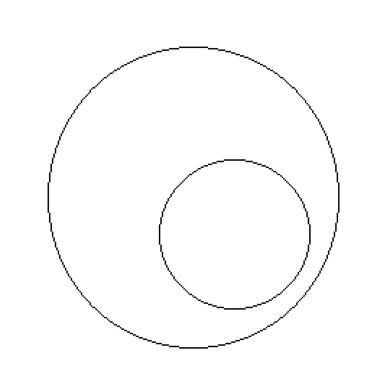

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('prs_res_DT/images_DT_PM/DT/contour3.bmp', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

**Ex2. Implementați Transformata Distanță Chamfer:** Calculați și vizualizați imaginea TD pentru imaginile de intrare: contour1.bmp, contour2.bmp, contour3.bmp.

Ar trebui să obțineți următoarele rezultate: 

<p align="center">
  <img src="prs_res_DT/images_DT_PM/DT/contour1.bmp" alt="image"/>
  <img src="prs_res_DT/images_DT_PM/DT/contour2.bmp" alt="image"/>
  <img src="prs_res_DT/images_DT_PM/DT/contour3.bmp" alt="image"/>
</p> 

<p align="center">
  <img src="imgs/contours1_result.png" alt="image"/>
  <img src="imgs/contours2_result.png" alt="image"/>
  <img src="imgs/contours3_result.png" alt="image"/>
</p> 

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

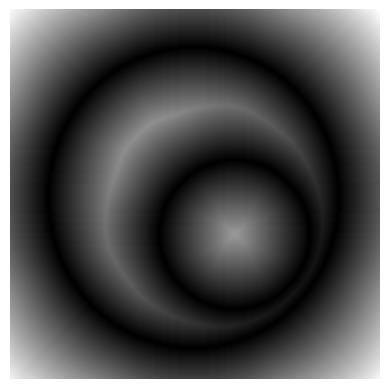

In [11]:
def compute_td_image(image):
    """
    Calculeaza imaginea TD a unei imagini si o returneaza.
    :param image: imaginea initiala
    :return: imaginea TD
    """
    ### YOUR CODE HERE
    dt = image.copy()
    di = [-1, -1, -1,  0, 0,  1, 1, 1]
    dj = [-1,  0,  1, -1, 1, -1, 0, 1]
    weight  = [3, 2, 3, 2, 2, 3, 2, 3]
    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            if image[i,j] == 0 :
                dt[i,j] = 0
            else:
                dt[i,j] = 255
   #prima traversare 
    h, w = dt.shape
    for i in range(h):
        for j in range(w):
            for k in range(4):
                ni = i + di[k]
                nj = j + dj[k]
                if 0 < ni < h and 0 < nj < w:
                    dt[i, j] = min(dt[i, j], int(dt[ni, nj]) + weight[k]) #int -> pentru a scapa de overflow
    # a doua traversare 
    for i in range(h-1,-1,-1):
        for j in range(w-1,-1,-1):
            for k in range(4,8):
                ni = i + di[k]
                nj = j + dj[k]
                if 0 < ni < h and 0 < nj < w:
                    dt[i, j] = min(dt[i, j], int(dt[ni, nj]) + weight[k])
    return dt

td_image = compute_td_image(image)

plt.imshow(td_image, cmap='gray')
plt.axis('off')

### Potrivirea de modele folosind DT

Dorim să calculăm un cost de similitudine între un model de obiect cunoscut și un obiect necunoscut. Considerăm că ambele obiecte au aceeași dimensiune.

Pașii pentru calcularea costului sunt:
1. Calcularea imaginii TD pentru modelul de obiect cunoscut
2. [Opțional] Suprapunerea obiectului necunoscut peste imaginea TD calculată anterior prin translatarea obiectului necunoscut astfel încât centrul său de masă să fie același cu centrul de masă al obiectului model. Pentru simplitate, centrele de masă se estimează din punctele de pe contur. Centrul de masă $(C_x, C_y)$ al obiectului descris de conturul Ω se poate aproxima după ecuația:
$$
\left( C_x, C_y \right) = \left( \frac{1}{N} \sum_{p \in \Omega} p_x , \frac{1}{N} \sum_{p \in \Omega} p_y \right)
$$
unde $(p_x, p_y)$ reprezintă coordonatele x și y ale punctului de contur p, iar N este lungimea conturului.


3.	Costul de similitudine (potrivire) este media tuturor valorilor pixelilor din imaginea TD care se află sub punctele de pe conturul obiectului necunoscut. Un cost mic de similitudine arată că obiectele sunt similare. 

<p align="center">
  <img src="prs_res_DT/images_DT_PM/PatternMatching/unknown_object2.bmp" alt="image"/>
  <img src="prs_res_DT/images_DT_PM/PatternMatching/template.bmp" alt="image"/>
  <img src="imgs/dt_result.png" alt="image"/>
</p> 

**Ex3.** Calculați imaginea TD pentru template.bmp. Evaluați costul de similitudine între imaginea model și cele două obiecte necunoscute: unknown_object1.bmp – pieton, unknown_object2.bmp – frunză. Costul de similitudine este media valorilor din imaginea TD de pe pozițiile punctelor de contur ale obiectului necunoscut. 

_Hint: Folosiți doar pașii 1 și 3 de mai sus._

In [20]:
def compute_score(template_image, target_image):
    """
    Calculeaza scorul dintre o imagine template si o imagine target.
    :param template_image: imaginea template
    :param target_image: imaginea target
    :return: scorul de similitudine
    """
    ### YOUR CODE HERE
    dt = compute_td_image(template_image)
    rows, cols = target2_image.shape
    m = 0 
    sum = 0.0
    for i in range (0,rows):
        for j in range (0,cols):
            if target_image[i,j] == 0:
                sum += dt[i,j]
                m += 1
    score = sum/m
    return score
   

template_image = cv2.imread('prs_res_DT/images_DT_PM/PatternMatching/template.bmp', cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread('prs_res_DT/images_DT_PM/PatternMatching/unknown_object1.bmp', cv2.IMREAD_GRAYSCALE)
target2_image = cv2.imread('prs_res_DT/images_DT_PM/PatternMatching/unknown_object2.bmp', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE
print(compute_score(template_image, target_image))
print(compute_score(template_image, target2_image))


17.50541871921182
54.42015706806283


Calculați costul de similitudine prin inversarea rolurilor de obiect necunoscut și obiect model.

In [23]:
print(compute_score(target_image,template_image))
print(compute_score(target2_image,template_image, ))

16.635330578512395
69.07851239669421


Translatați obiectul necunoscut astfel încât centrul său să corespundă cu centrul obiectului model și recalculați costurile de potrivire.

In [37]:
def compute_center_of_mass(image):
    """
    Calculeaza centrul de masa al unei imagini si il returneaza.
    :param image: imaginea initiala
    :return: coordonatele centrului de masa
    """
    ### YOUR CODE HERE
    #media coordonatelor x si y 
    contur = np.equal(image, 0)
    y, x = np.indices(image.shape)
    
    x_coord = np.sum(x[contur]) / np.sum(contur)
    y_coord = np.sum(y[contur]) / np.sum(contur)
    print(x_coord, y_coord)
    return int(x_coord), int(y_coord)

def compute_improved_score(template_image, target_image):
    """
    Calculeaza scorul de similitudine intre doua imagini.
    :param template_image: imaginea template
    :param target_image: imaginea target
    :return: scorul de similitudine
    """
    x, y = compute_center_of_mass(template_image)
    x_T, y_T = compute_center_of_mass(target_image)
    
    tx = x - x_T
    ty = y - y_T
    
    # Translatarea imaginii target
    rows, cols = target_image.shape
    translated_target = np.zeros((rows, cols), dtype=target_image.dtype)
    for i in range(rows):
        for j in range(cols):
            ni = i + ty
            nj = j + tx
            if 0 <= ni < rows and 0 <= nj < cols:
                translated_target[ni, nj] = target_image[i, j]
    
    dt = compute_td_image(template_image)
    
    sum = 0.0
    m = 0
    for i in range(rows):
        for j in range(cols):
            if translated_target[i, j] == 0:  #contur
                sum += dt[i, j]
                m += 1
    similarity_score = sum / m if m > 0 else 0
    return similarity_score

template_image = cv2.imread('prs_res_DT/images_DT_PM/PatternMatching/template.bmp', cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread('prs_res_DT/images_DT_PM/PatternMatching/unknown_object1.bmp', cv2.IMREAD_GRAYSCALE)

print("Scorul de similitudine improved:", compute_improved_score(template_image, target_image))

98.89566115702479 222.40392561983472
100.17339901477833 224.9320197044335
Scorul de similitudine improved: 72.5311519497983
